<a href="https://colab.research.google.com/github/soumik0303/PythonTuts/blob/main/Aerofit_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aerofit:-

Aerofit is a leading brand in the field of fitness equipment.Aerofit provides a product range including machines such as treadmills,exercisebikes,gym equipments and fitness accessories to cater to the needs of all categories of people.

#Business Problem:-
The market research team of AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company,to provide a better recommendation of the treadmill to the new customers. the team decides to investigate whether there are differences accross the product with respect to customer characteristics.

1.Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

2.For each Aerofit treadmill product,conduct two way contengency table and compute all conditional and marginal probabilities along with their insights/impacts on the business.

#Import all the libraries and Data:-


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [23]:
!wget -O aerofit.csv "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749"

--2024-04-08 08:30:22--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.239.15.40, 18.239.15.11, 18.239.15.217, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.239.15.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.11K  --.-KB/s    in 0.001s  

2024-04-08 08:30:22 (13.5 MB/s) - ‘aerofit.csv’ saved [7279/7279]



In [24]:
df = pd.read_csv('aerofit.csv')

In [25]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [26]:
print('Number of row:- ',df.shape[0])
print('Number of columns:- ',df.shape[1])

Number of row:-  180
Number of columns:-  9


#Checking the missing values

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#Statistical Summary of Data


In [28]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


#Observation:-

1.There are no missing value in this data.

2.There are 3 unique products in the dataset.

3.KP281 is the most frequent product.

4.Minimum and maximum age of the person is 18 and 50,mean is 28.78 and 75% people age is equal or above to 33.

5.Most of the people have educational experience of 16 years. It means 75% have education experience of <=16 years.

6.Out of 180 data points 104 is of Male and rest are Female.

7.standard Deviation for income and miles are very high.These variables might have outliers in it.


In [29]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

There are 3 unique products are available in this dataset.

#Univariate Analysis

Understanding the distribution of data for the quantitive attributes

1.Age

2.Education

3.Usage

4.Fitness

5.Income

6.Miles

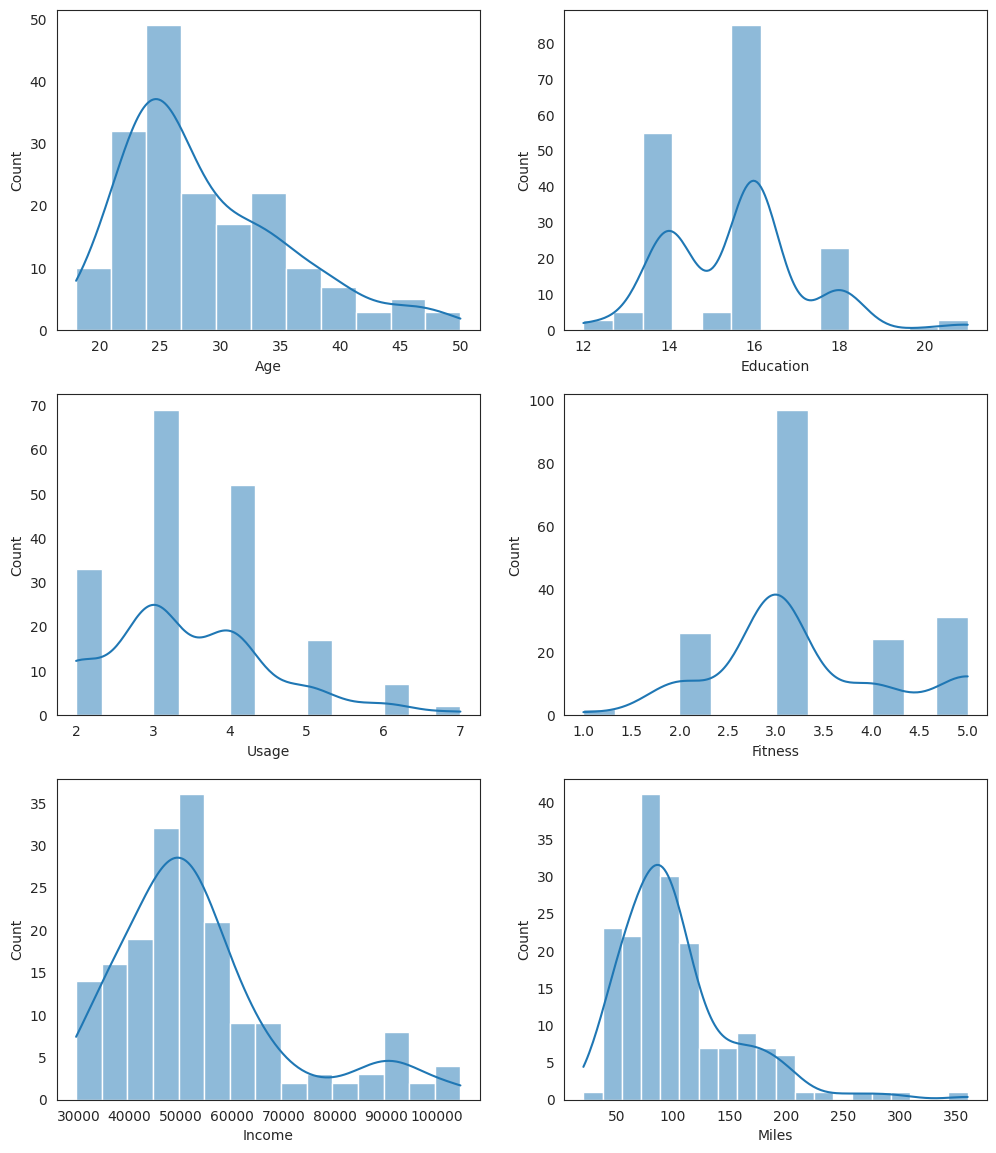

In [30]:
fig,axis=plt.subplots(nrows=3,ncols=2,figsize=(12,10))
fig.subplots_adjust(top=1.2)
sns.histplot(data=df,x='Age',kde=True,ax=axis[0,0])
sns.histplot(data=df,x='Education',kde=True,ax=axis[0,1])
sns.histplot(data=df,x='Usage',kde=True,ax=axis[1,0])
sns.histplot(data=df,x='Fitness',kde=True,ax=axis[1,1])
sns.histplot(data=df,x='Income',kde=True,ax=axis[2,0])
sns.histplot(data=df,x='Miles',kde=True,ax=axis[2,1])
plt.show()

Outliers detection using boxplots

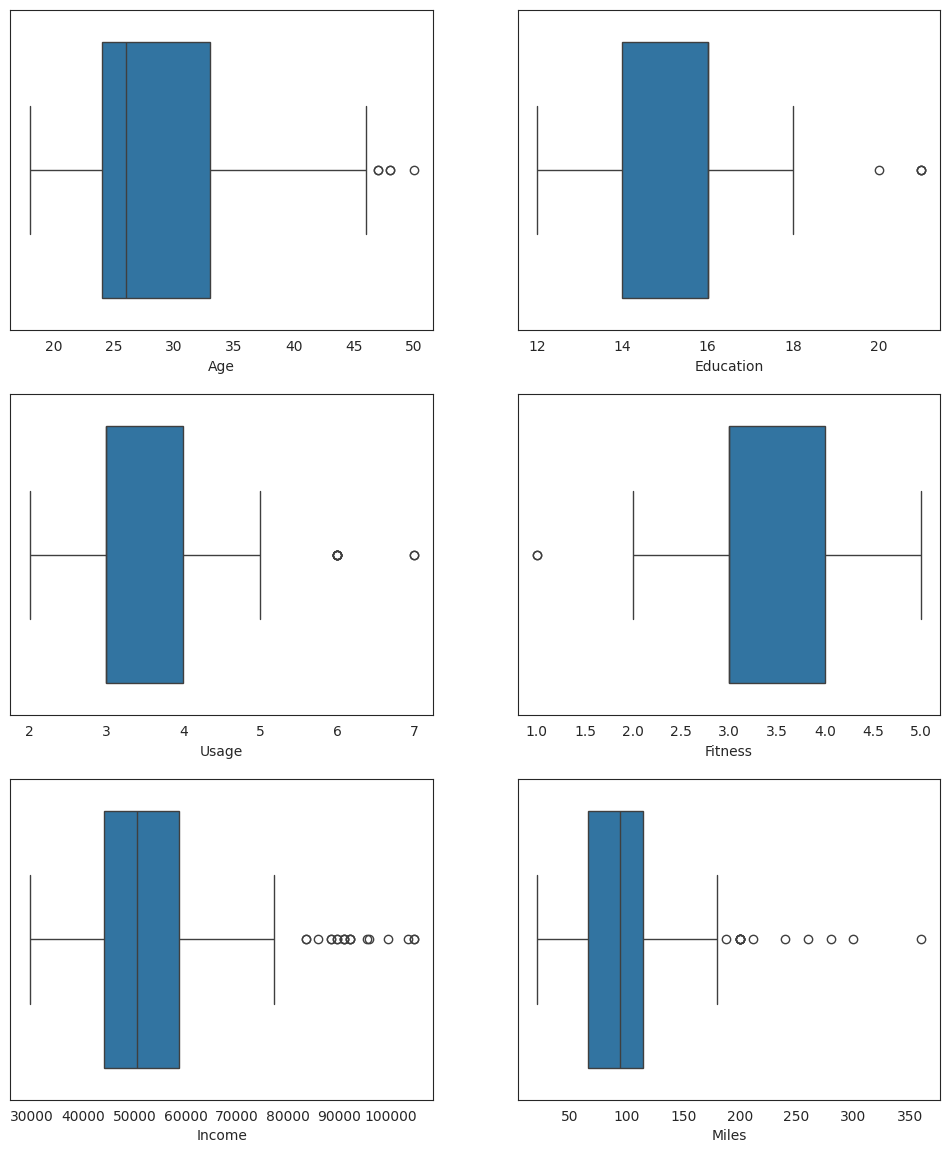

In [31]:
fig,axis=plt.subplots(nrows=3,ncols=2,figsize=(12,10))
fig.subplots_adjust(top=1.2)
sns.boxplot(data=df,x='Age',orient='h',ax=axis[0,0])
sns.boxplot(data=df,x='Education',orient='h',ax=axis[0,1])
sns.boxplot(data=df,x='Usage',orient='h',ax=axis[1,0])
sns.boxplot(data=df,x='Fitness',orient='h',ax=axis[1,1])
sns.boxplot(data=df,x='Income',orient='h',ax=axis[2,0])
sns.boxplot(data=df,x='Miles',orient='h',ax=axis[2,1])
plt.show()

#Observation
Even from the boxplot,it is quite clear that:

1.Age,Education and Usage are having very few outliers.

2.While Income and Miles having more outliers.

#Understanding the distribution of data for the qualitative attributes:

1.Product

2.Gender

3.MaritalStatus

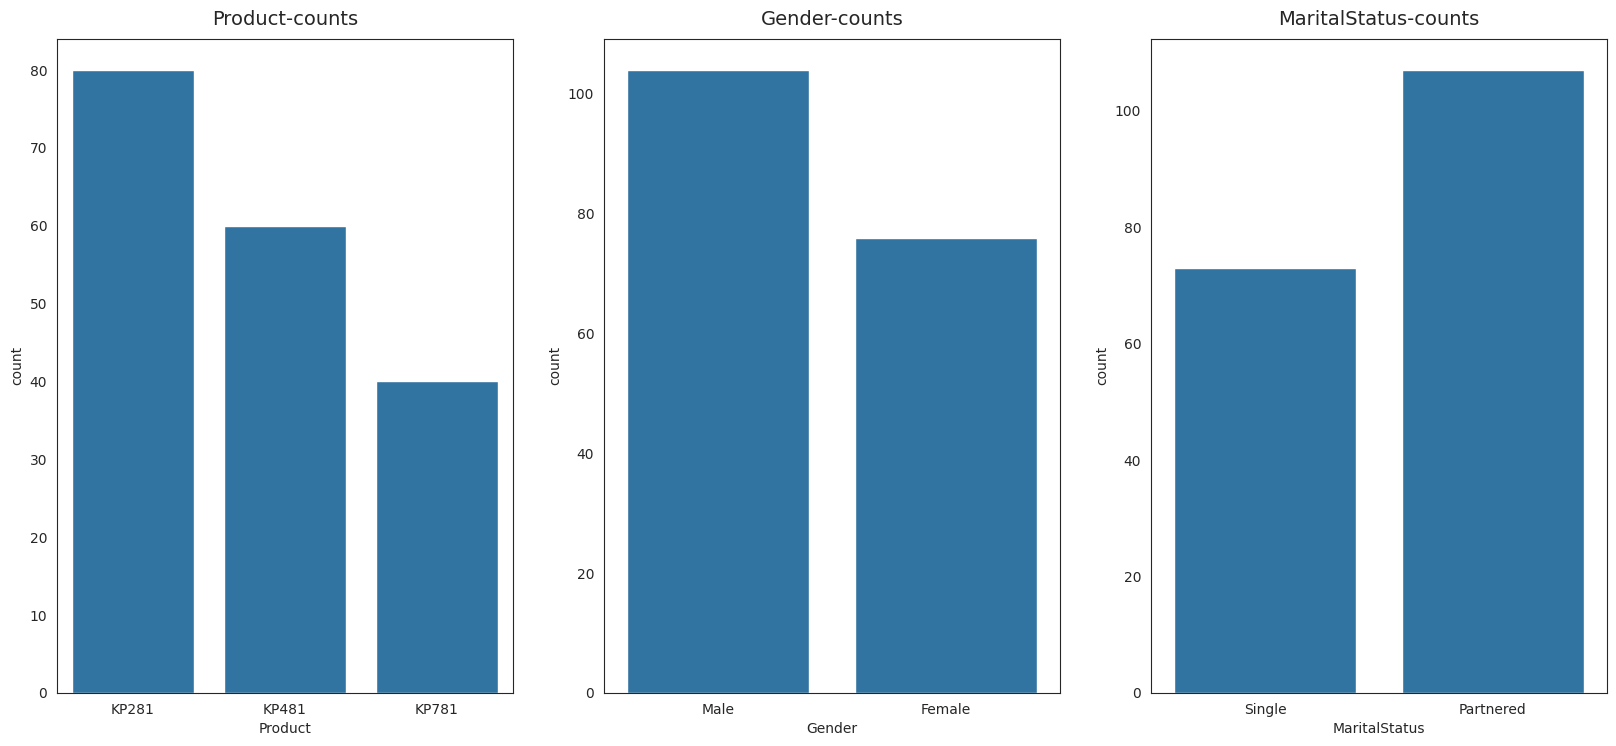

In [32]:
fig,axis=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
fig.subplots_adjust(top=1.2)
sns.countplot(data=df,x='Product',ax=axis[0])
sns.countplot(data=df,x='Gender',ax=axis[1])
sns.countplot(data=df,x='MaritalStatus',ax=axis[2])
axis[0].set_title('Product-counts',pad=10,fontsize=14)
axis[1].set_title('Gender-counts',pad=10,fontsize=14)
axis[2].set_title('MaritalStatus-counts',pad=10,fontsize=14)
plt.show()

#Observations

1.KP281 is the most frequent product.

2.There are more male in the dataset than the female.

3.More partnered people are there in the dataset.

To be precise normalize normalized count for each variable has been given below

In [33]:
df1=df[['Product','Gender','MaritalStatus']].melt()
df1.groupby(['variable','value'])[['value']].count()/len(df)*100

value
variable      value               
Gender        Female     42.222222
              Male       57.777778
MaritalStatus Partnered  59.444444
              Single     40.555556
Product       KP281      44.444444
              KP481      33.333333
              KP781      22.222222

#Observation:-
Product:-

1.KP281 has 44% of sales.

2.KP481 has 33% of sales.

3.KP781 has 22% of sales.

Gender:-

1.57% of customers are male.

2.42% of customers are female.

Marital Status:-

1.In ths dataset 59% of customers are partnered.

2.On the other hand 40% of customers are single.

#Bi-variate Analysis:-

**Checking if features -Gender or marital status has any impact on the product purchase**

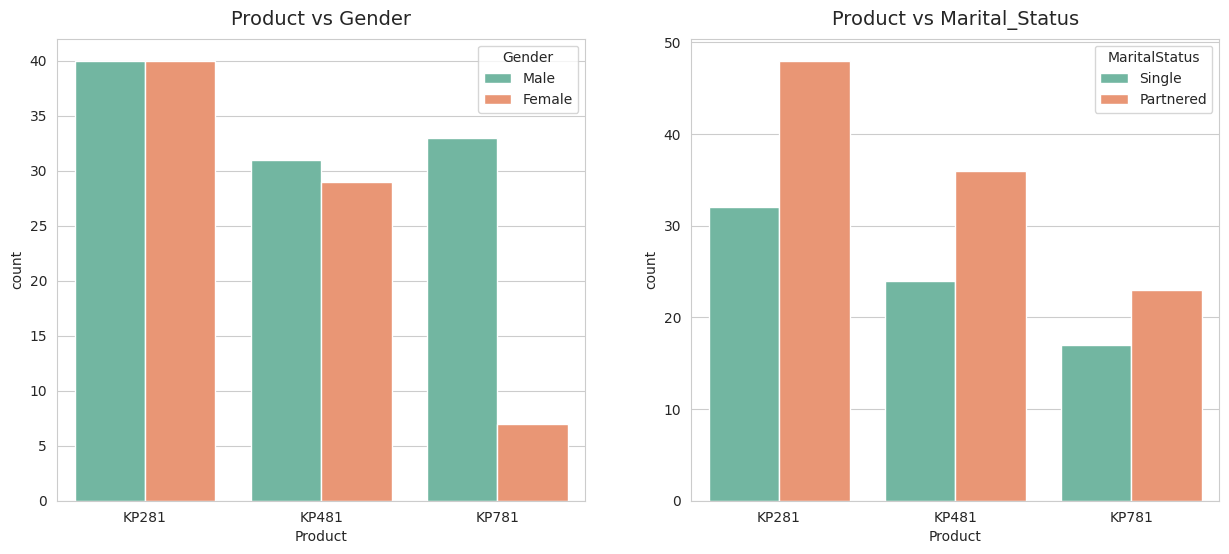

In [34]:
sns.set_style(style='whitegrid')
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.countplot(data=df,x='Product',hue='Gender',palette='Set2',ax=axis[0])
sns.countplot(data=df,x='Product',hue='MaritalStatus',palette='Set2',ax=axis[1])
axis[0].set_title('Product vs Gender',pad=10,fontsize=14)
axis[1].set_title('Product vs Marital_Status',pad=10,fontsize=14)
plt.show()

#Observation:-

**Product vs Gender**

1.Equal number of male and female have purchased KP281 product and it's almost same for the KP481.

2.Most of the male customers have purchased KP781 product.

**Product vs Marital_Status**

1.Customers who are partnered,are more likely to purchase the product.

**Checking if following products have any effect on product purchase**

Age

Education

Usage

Fitness

Income

Miles

<ipython-input-35-262abb6ecf49>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Product',y=attrs[count],ax=axis[i,j],palette='Set3')
<ipython-input-35-262abb6ecf49>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Product',y=attrs[count],ax=axis[i,j],palette='Set3')
<ipython-input-35-262abb6ecf49>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Product',y=attrs[count],ax=axis[i,j],palette='Set3')
<ipython-input-35-262abb6ecf49>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and 

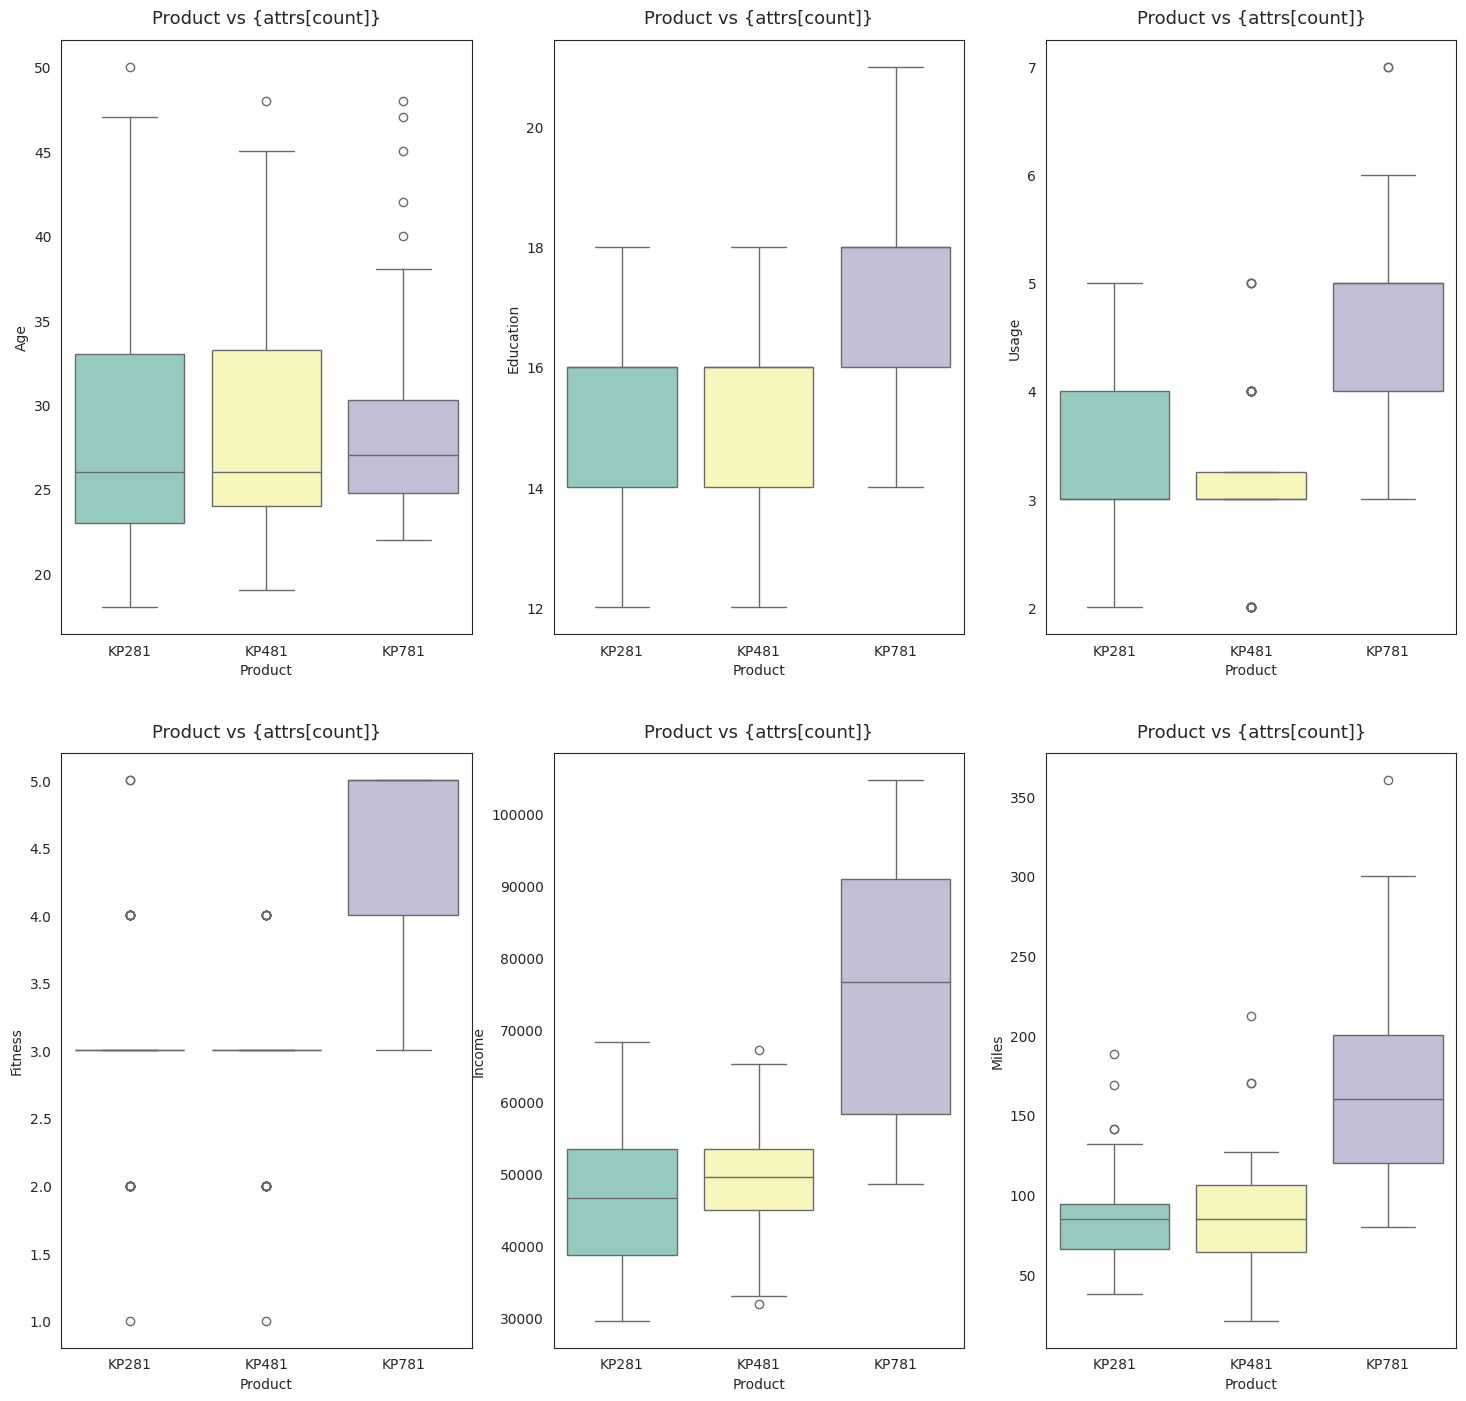

In [35]:
attrs=['Age','Education','Usage','Fitness','Income','Miles']
sns.set_style(style='white')
fig,axis=plt.subplots(nrows=2,ncols=3,figsize=(18,12))
fig.subplots_adjust(top=1.2)
count=0
for i in range(2):
  for j in range(3):
    sns.boxplot(data=df,x='Product',y=attrs[count],ax=axis[i,j],palette='Set3')
    axis[i,j].set_title('Product vs {attrs[count]}',pad=12,fontsize=13)
    count=count+1
plt.show()

#Observations:-

**Product vs Age**

1.Customer Purchasing products KP281 and KP481 are having same age median value.

2.Customers whose age lie between 25-30 are more likely to buy KP781 product.


**Product vs Education**

1.Customers whose education is greater than 16 years have more chances to buy KP781 product.

2.While the customers whose education is less than 16 years have equal chances to purchase KP281 and KP481.

**Product vs Usage**

1.Customers who are planning to use Treadmill greater than four times a week,are more likely to purchase the KP781.

2.While other customers are likely to purchase KP281 and KP481.

**Product vs Fitness**

The more the customer is fit,higher the customer's chances to purchase KP781.

Product vs Income:-

Customers those who have higher income have the chances to purchase KP781 product.

Product vs Miles:-

If the customer expects to walk or run 120 miles per week,it is more likely the customer will buy KP781 Product.

#Computing Marginal and Conditional Probability


**Probability of Product Purchase with respect to Gender**

In [36]:
pd.crosstab(index=df['Product'],columns=df['Gender'],margins=True,normalize=True).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


#Observation

**Probability of a treadmill being purchased by a female is 42%.**

1.among them 22% female buy KP281 product.

2.16% female buy KP241 product.

3.4% female buy KP781 product.

**Probability of a treadmill being purchased by male is 58%.**

1.Among then 22% male buy KP281 Product.

2.17% male purchase KP481.

3.18% male purchase KP781.

In [38]:
range=[17,25,35,45,float('inf')]
label=['Young','Young Adult','Middle aged Adult','Elder']
df['Age_Group']=pd.cut(df['Age'],bins=range,labels=label)

#Probability of product purchase with respect to Age

In [40]:
pd.crosstab(index=df['Product'],columns=df['Age_Group'],margins=True,normalize=True).round(2)

Age_Group,Young,Young Adult,Middle aged Adult,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


#Observations:-

**1.Total 44% of young people have purchased the products.**

a.Among them 19% bought KP281.

b.16% have purchased KP481.

c.9% have purchased KP781.


2**.Total 41% young adults have purchased the products**

a.Among them 18% bought KP281.

b.13% purchased KP481.

c.9% have purchased KP781.



**3.Total 12% middle aged aduls purchased the product.**

**4.Total 3% Elder people have puchased the product.**



#Insights of Aerofit Case-Study:-

1.There are 3 unique products,these are KP281,KP481 and KP781.

2.KP281 is the product that has the maximum sales.

3.Products have more Male buyers than the Female.

4.Fittest customers have the tendency to buy KP781.

5.Young customers have Tendency to purchase KP281.

6.Partnered people purchase more products than the Single.

7.People who have higher income have the tendency to buy KP781 product.

#Recommendations:-

**1.Marketing campaigns for KP781:-**

KP781 exhibits a significant sale disparity in terms of gender,only 4% of Female sales have been attributed.To enhance this metric it is recommended to implement targeted strategies,such as special promotion for that specific product.


**2.Affordable pricing and payment method:-**

Given the target customer's age,education and income,it's important to offer the KP281 and KP481 at affordable price,it is also suggested to offer flexible payment method for these two products.This can make the treadmills more accessible to the customer with varying budget.

**3.Usser-friendly App Integration:-**

Create a user-friendly app that syncs with the treadmill. This app could track users weekly running mileage,provide real time feedback and offer personalized recommendations for workout based on their fitness scales and goals.